In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:
from datetime import datetime, timedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['station', 'measurement']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
# most_recent_date = session.query(func.max(Measurement.date)).scalar()
# most_recent_date

In [15]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date))
most_recent_date
# for item in most_recent_date:
#     print(item)
most_recent_date[0][0]

'2017-08-23'

In [43]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates


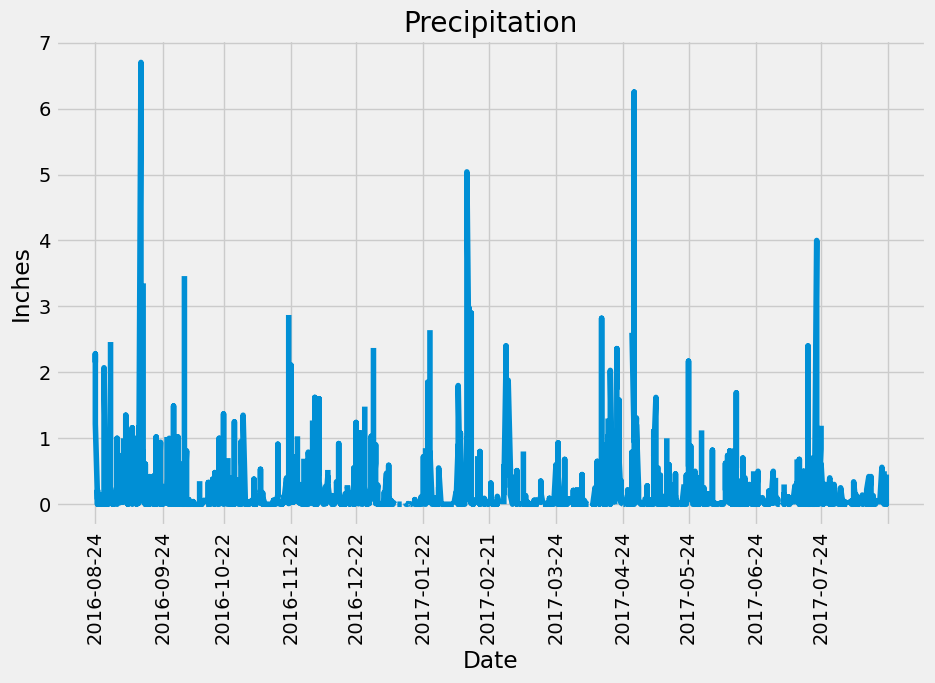

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(Measurement.date))
most_recent_date_pt = most_recent_date.scalar()
most_recent_date_object = datetime.strptime(most_recent_date_pt, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
date_twelve_mos_ago = most_recent_date_object - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date_twelve_mos_ago)
results

# Iterate on the results object to print the date and precipitation values
# for date, prcp in results:
#     print(f"Date: {date}, Precipitation: {prcp}")

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'prcp'])
# df.head(50)

# Sort the dataframe by date
df_sorted = df.sort_values(by='date')
df_sorted.head(5)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))

# List plot wiht markers
plt.plot(df_sorted['date'], df_sorted['prcp'])

plt.title('Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')

# set x-axis majore ticks to monthly interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)

plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

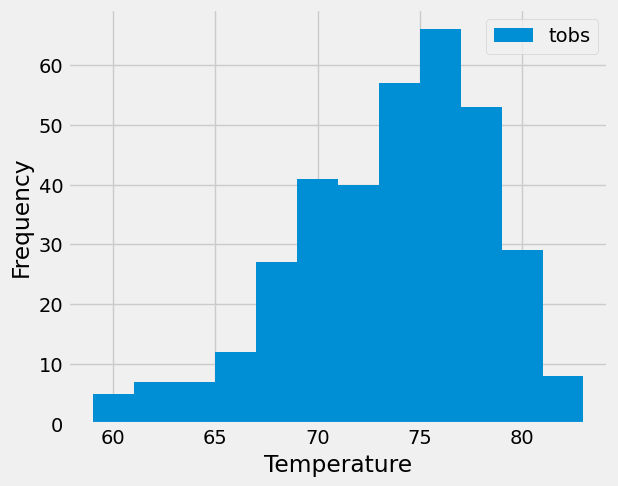

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()